# ロジスティック回帰

In [11]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as colors
import seaborn as sns; sns.set()

sns.set_context('talk')

np.random.seed(12345)

## データ生成

(-2.0, 6.0)

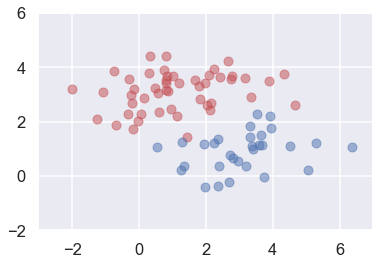

In [12]:
mu1 = np.array([1, 3])  # クラス1の中心
mu2 = np.array([3, 1])  # クラス2の中心
cov = 2 *np.array([[1.0,0.2], [0.2, 0.3]])  # 共分散行列（全クラス共通）
cov1 = cov2 = cov

N1 = 50
N2 = 30

x1 = np.random.multivariate_normal(mu1, cov1, N1)
x2 = np.random.multivariate_normal(mu2, cov2, N2)
x = np.vstack((x1, x2))

# ラベルは±1 ￥を張り付けておく
y1 = np.ones(N1)
y2 = -np.ones(N2)
y = np.hstack((y1, y2))

plt.plot(x[y==1, 0], x[y==1, 1], 'ro', alpha=0.5)
plt.plot(x[y==-1, 0], x[y==-1, 1], 'bo', alpha=0.5)

plt.xlim(-3, 7)
plt.ylim(-2, 6)

In [13]:
# ロジスティック
def logistic(x):
    return 1/(1+np.exp(-x))

# 予測値計算
def yprob(x, w):
    N = x.shape[0]
    xnew = np.hstack((np.ones((N, 1)), x))
    
    return logistic(xnew @ w)

def Ep(w, x, t):
    # x の最初の列に 1 からなるN行ベクトルを付け加えてｗを適正に扱えるようにしておく
    eps = 1e-15
    tnew = (t + 1) / 2  # ラベルを (0, 1) に変更
    y = yprob(x, w)
    return -np.sum(tnew * np.log(y+eps) + (1-tnew) * np.log(1-y+eps))


def update_w(w, x, t):
    
    N = x.shape[0]
    Phi = np.hstack((np.ones((N, 1)), x))
    tnew = (t + 1) / 2  # ラベルを (0, 1) に変更

    y = yprob(x, w)
    grad = Phi.T @ (y-tnew)
    rr = y * (1-y)
    R = np.diag(rr)
    Hesse = Phi.T @ R @ Phi
    diff = np.linalg.solve(Hesse, Phi.T @ (y-tnew))
    
    return sum(grad**2), w - diff


def drawprob(w, xrng=(0, 1), yrng=(0, 1)):
    xx1 = np.linspace(xrng[0], xrng[1])
    xx2 = (w[0] + w[1] * xx1) / (-w[2])
    
    xx, yy = np.meshgrid(np.linspace(xrng[0], xrng[1], 256),
                         np.linspace(yrng[0], yrng[1], 256))
    meshdat = np.c_[xx.ravel(), yy.ravel()]
    Z = yprob(meshdat, w)
    Z = Z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, cmap='coolwarm', norm=colors.Normalize(0., 1.), zorder=0, alpha=0.1)
    im = plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
   
    
    return im

In [14]:
w = np.random.uniform(low=-1, high=1, size=3)

# ニュートン法
for n in range(20):
    g2, w = update_w(w, x, y)
    print('Epoch:{:02d}'.format(n+1), g2, Ep(w, x, y))
    if g2 < 1e-4:
        break

Epoch:01 13440.024353665818 43.58818226544399
Epoch:02 3629.177064264337 32.19263436373345
Epoch:03 2966.041074391457 12.824179532598093
Epoch:04 141.76210818190333 7.522111834231966
Epoch:05 18.17921313602453 5.231770180158529
Epoch:06 2.6167991035285376 4.218634096470163
Epoch:07 0.4932108990567333 3.7786554817630527
Epoch:08 0.11212971946843887 3.569315499591011
Epoch:09 0.019430252782299914 3.46584783545919
Epoch:10 0.0016411646805674174 3.431888681661795
Epoch:11 0.0008109376957268835 3.428481397417855
Epoch:12 2.813546100714268e-05 3.4284480777774524


C:\Users\messi\AppData\Local\Temp/ipykernel_27448/3942494738.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='coolwarm', norm=colors.Normalize(0., 1.), zorder=0, alpha=0.1)
No handles with labels found to put in legend.


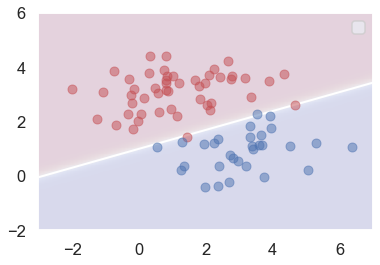

In [15]:
fig = plt.figure()
plt.xlim(-3, 7)
plt.ylim(-2, 6) 

drawprob(w, xrng=(-3, 7), yrng=(-2, 6))

# データ点の描画
plt.plot(x[y==1, 0], x[y==1, 1], 'ro', alpha=0.5)
plt.plot(x[y!=1, 0], x[y!=1, 1], 'bo', alpha=0.5)

plt.legend()